---

#  Mplfinance Used To Plot Golden Cross Over

---

### What Is a Golden Cross?
A golden cross is a chart pattern in which a relatively short-term moving average crosses above a long-term moving average.
- The golden cross is a bullish breakout pattern formed from a crossover involving a security's short-term moving average (such as the 15-day moving average) breaking above its long-term moving average (such as the 50-day moving average) or resistance level. 
- As long-term indicators carry more weight, the golden cross indicates a bull market on the horizon and is reinforced by high trading volumes.

---

### mplfinance 'yahoo' styles was used to customize:
- Type of Plot Use `candle`
- Dochian Channel Build With Three Types Lines Named Upper Band, Middle Band and Lower Band
- Background, Grid, and Figure Colors
- Grid style
- Y-Axis On The Right or Left
- Matplotlib Defaults
- Alpha
- Color
- Markers
#### The simplest way to do this is to choose one of the `add_plot` that come packaged with `mplfinance`
#### but, as we see below, it is also possible to customize your own `mplfinance styles`.
#### Also Other Plot Type Can Be Used

---

import pandas as pd
import mplfinance as mpf
import numpy as np

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import mplfinance as mpf
import numpy as np

### Read in daily data for the S&P 500 from November of 2019 

In [3]:
idf = pd.read_csv('../data/yahoofinance-INTC-19950101-20040412.csv',index_col=0,parse_dates=True).tail(200)

df = idf.copy()
df.index.name = 'Date'
df.shape
df.head(2)
df.tail(2)

(200, 6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-06-25,20.530001,20.83,19.99,20.040001,13.693501,61250600
2003-06-26,20.299999,20.76,20.15,20.629999,14.096654,52904900


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-04-07,28.08,28.129999,27.480000,27.620001,18.923342,72680200
2004-04-08,28.08,28.139999,27.200001,27.370001,18.752058,71791400


---
- **Golden Crossover has 2 lines: Short Term Moving and Long Term Moving Average. They are calculated as follows:**

- Short Term = The Rolling Mean the Previous Short periods
- Long Term = The Rolling Mean the Previous Long periods
- **Here is Following Calculation:**
---

In [4]:
df['SMA21'] = df['Close'].rolling(window=21).mean()
df['SMA50'] = df['Close'].rolling(window=50).mean()

### Function For Color Coding Golden Crossover

In [5]:
def color(goldencrossover):
    UP = []
    DOWN = []
    for i in range(len(goldencrossover)):
        if goldencrossover['SMA50'][i] < goldencrossover['SMA21'][i]:
            UP.append(float(goldencrossover['SMA50'][i]))
            DOWN.append(np.nan)
        elif goldencrossover['SMA50'][i] > goldencrossover['SMA21'][i]:
            DOWN.append(float(goldencrossover['SMA50'][i]))
            UP.append(np.nan)
        else:
            UP.append(np.nan)
            DOWN.append(np.nan)
    goldencrossover['up'] = UP
    goldencrossover['down'] = DOWN
    return goldencrossover

### Function For Checking Cross Over Golden Crossover

In [6]:
def golden_cal(df):
    goldenSignal = []
    deathSignal = []
    position = False
    for i in range(len(df)):
        if df['SMA21'][i] > df['SMA50'][i]:
            if position == False :
                goldenSignal.append((df['SMA50'][i]-df['SMA50'][i]*0.01))
                deathSignal.append(np.nan)
                position = True
            else:
                goldenSignal.append(np.nan)
                deathSignal.append(np.nan)
        elif df['SMA21'][i] < df['SMA50'][i]:
            if position == True:
                goldenSignal.append(np.nan)
                deathSignal.append((df['SMA50'][i]+df['SMA50'][i]*0.01))
                position = False
            else:
                goldenSignal.append(np.nan)
                deathSignal.append(np.nan)
        else:
            goldenSignal.append(np.nan)
            deathSignal.append(np.nan)
    df['GoldenCrossOver'] = goldenSignal
    df['DeathCrossOver'] = deathSignal

In [7]:
golden_cal(df)

In [8]:
#Fuction Color Applied And Df Generated 
goldencrossover = color(df)

In [9]:
# Data Extracted And New Variable Applied
up_sma100 = goldencrossover[['up']]
down_sma100 = goldencrossover[['down']]
up_sma21 = goldencrossover[['SMA21']]
dco = goldencrossover[['GoldenCrossOver']]
gco = goldencrossover[['DeathCrossOver']]

---

Let's say we want to plot the Ichimoku Cloud along with the basic OHLCV plot.  

We Use `make_addplot()` to create the addplot dict, and pass that into the plot() function:

We Use `Color` To Define Line Colors

We Use `alpha` To Define Depth Line Color

We Use `Makers` To Define Cross Over Point

We Use `linestyle` to Highligh Short Term Moving Average

In [10]:
ic = [
    #Golden Crossover
    mpf.make_addplot(up_sma100,color = 'green',panel=0,),
    mpf.make_addplot(down_sma100,color = '#FF8849',panel=0,),
    mpf.make_addplot(up_sma21,color = '#0496ff',panel=0,linestyle='dashdot'),
    mpf.make_addplot(gco,type='scatter',markersize=200,marker='v',color='red',panel=0),
    mpf.make_addplot(dco,type='scatter',markersize=200,marker='^',color='green',panel=0),
]

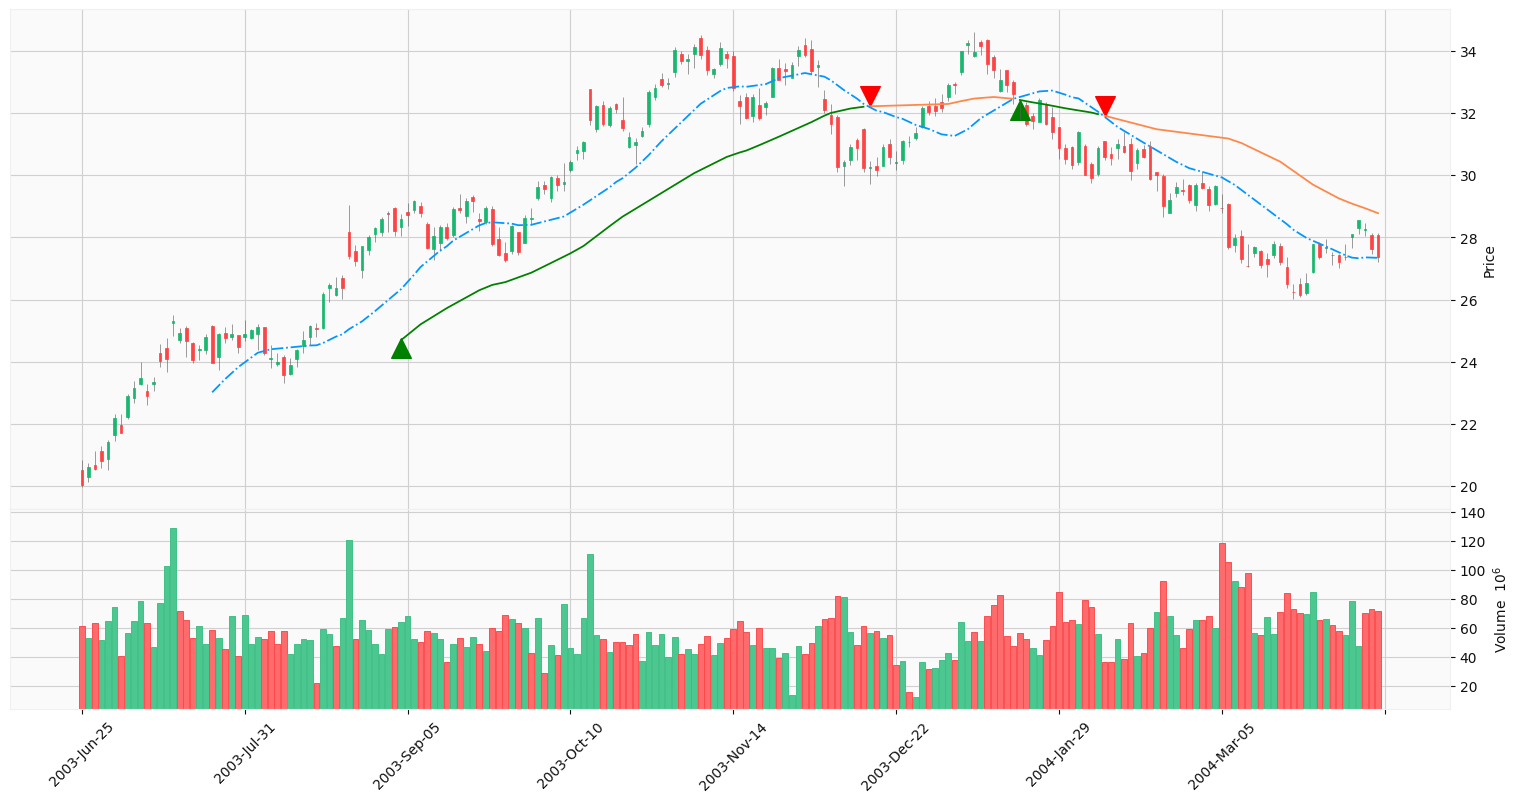

In [11]:
mpf.plot(
    df,
    volume=True,
    type="candle", 
    style="yahoo",
    addplot=ic,
    figsize=(20,10)
)